# Money within the Area of College Sports (With a focus into UCLA's Finances)

## Tyler Nguyen
## 14 March 2022

### Introduction

One of the most common concerns within the scope of Universities costs is how well schools are allocating their money. Traditionally, schools have a responsibility to their interests but many students today may have trouble understanding the true allotment of their finances. Within this research, the data from the revenues and expenses of UCLA may help answer these questions based on the analysis of the school's spending. In fact, there will be data visualizations and plots that compare UCLA within their sport's divisions finances to truly reveal how contrasting the financial habits are at UCLA.

Specifically, the research question we pose is how transparent and effective is UCLA's allocation of funds for their sports programs. Is it justifiable for many schools to be under intense criticism for their extensive funding in sports as an academic establishment? In order to answer these questions, we took many parts of UCLA's finances, such as *ticket sales* or *student fees*, to approach trends that can tell us more about UCLA's financial allocations.

The main motivation to research this topic is the relevancy of the issue. UCLA's football coach, Chip Kelly, is set to make \\$23 million dollars on his next contract (with an average of \\$4.7 million annually)[^1]. On the other hand, staff, professors, and other faculty struggle to earn pay close to a deserved standard. Students are the ones that have an impact on the revenue of academic institutions, thus, it is expected that they should know where and how the money is allocated in sports (in particular the large football programs).

As a student at UCLA, I am inclined to deliver these results. My background as a Statistics student helped during the analysis and the findings of this research. I have performed other research projects with relevancy in predicting or using machine learning classification techniques on data. The data from the College Athletics Financial Information (CAFI) Database contains a lot of numerical data that was used to perform statistical analysis.

[^1]: https://abc7.com/sports/ucla-bruins-chip-kelly-agree-to-four-year-extension-through-2025/11469630/#:~:text=The%20new%20contract%20will%20pay,record%20in%20Kelly's%20four%20years.

### Methods

In [275]:
import pandas as pd
# commands to read the datafile
df = pd.read_csv("University_of_California_Los_Angeles_data.csv")
# http://cafidatabase.knightcommission.org/fbs/pac-12/university-of-california-los-angeles

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Data                                                                   48 non-null     object 
 1   IPEDS ID                                                               16 non-null     float64
 2   Year                                                                   48 non-null     int64  
 3   NCAA Subdivision                                                       16 non-null     object 
 4   FBS Conference                                                         16 non-null     object 
 5   Total Expenses                                                         48 non-null     object 
 6   Excess Transfers Back                                                  48 non-null     objec

When reading the data from CAFI, we can see that the data is structured in a 48x30 shape. We will keep this in mind since there are a lot of columns compared to the number of observations. Specific analysis tools will be used for this type of data structure. Overall, we are provided the revenues and expenses from the data. Since there are many subsections of the spending, we can further investigate these variables individually further. One important column that will be useful is *Year* which will be helpful for time analysis.

In [277]:
df.sample()

,Data,IPEDS ID,Year,NCAA Subdivision,FBS Conference,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
41,Football Bowl Subdivision Median,NaN,2014,NaN,NaN,"$6,484,238,164",$0,"$885,767,644","$89,026,674","$166,747,098",...,"$104,636,924","$1,496,681,208","$1,401,025,468","$727,156,590","$523,657,593","$118,524,877,569","$1,743,935,317","$494,809,692","$7,606,154,792","$566,948,608"


The rows are structured by year and essentially sorted by the column *Data* in which it may come from either UCLA, Pac-12 median, or Football Bowl Subdivision Median. This is useful to understand since we will be grouping by Data in much of the analysis to compare the observations. The observations of the data already reveal much-needed cleaning and data manipulation. This section begins the data cleaning.

In [278]:
# We can remove useless columns that mess with our missing values
df = df.drop("IPEDS ID", axis = 1) # we don't need the ID since it is useless to our analysis
df = df.drop("NCAA Subdivision", axis = 1) # We already know UCLA is in the Football Bowl Subdivision
df = df.drop("FBS Conference", axis = 1) # We already know UCLA is in the Pacific-12 Conference
# We will leave the other nan since the other cols are important observations
df.sample()

,Data,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
11,University of California-Los Angeles,2016,"$98,913,023",$0,"$14,758,783","$926,492","$1,273,500","$1,207,096","$14,930,107","$13,938,988",...,"$840,402","$32,909,836","$18,361,978","$60,000","$2,598,559","$4,257,791,817","$26,735,958","$8,258,884","$100,428,566","$2,978,699"


Some columns are useless to our analysis. Removing them will help simplify our analysis tools since they do not provide any new insights for each observation.

In [279]:
# We need to check for missing NaN values in the rows as well
print("Shape of our df:", df.shape)
print("Shape of our df with NaN removed:", df.dropna().shape)
# This shows us that dropping we have 2 rows that contain some missing values, we will ignore this
df[df.isna().any(axis=1)]
# rows 1 and 13 have missing values

Shape of our df: (48, 27)
Shape of our df with NaN removed: (46, 27)


,Data,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
1,University of California-Los Angeles,2006,"$52,049,868",$0,"$9,198,032","$380,702","$1,965,680","$617,966","$8,902,715","$6,649,403",...,"$3,129,670","$11,656,366","$13,895,922","$210,000","$2,418,140","$2,099,931,000","$13,458,173","$2,433,931",NaN,"$39,777"
13,University of California-Los Angeles,2018,"$130,960,560",$0,"$19,321,534","$990,900","$1,596,000","$1,620,167","$16,919,319","$18,319,503",...,"$1,184,874","$35,737,984","$18,033,018","$60,000","$2,548,165","$4,513,846,740","$37,702,515",NaN,"$92,639,138","$3,077,294"


There are two rows (out of 48) that contain missing values. With limited observations, each row is essential for our analysis. Thus, choose not to omit these rows and instead keep them in mind for later imputation. 

In [296]:
# We need to convert the string columns of money ($) back to int using the following library and suggestion reference
# from stackoverflow:
# https://stackoverflow.com/questions/8421922/how-do-i-convert-a-currency-string-to-a-floating-point-number-in-python
from re import sub
from decimal import Decimal
import math

for col in range(2, df.shape[1]):
    for row in range(0, df.shape[0]):
        if isinstance(df.iloc[row, col], str):
            df.iloc[row, col] = int(Decimal(sub(r'[^\d.]', '', df.iloc[row, col])))
# changes each string column from index 2 to the last column into int
df = pd.concat([df[["Data", "Year"]], df.drop(["Data", "Year"], axis = 1).apply(pd.to_numeric)], axis = 1)
# changes cols to int

df.sample()

,Data,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,...,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities",Net Profit
47,Football Bowl Subdivision Median,2020,8716758430,52728504,903423611,114560600,189081664,119985931,883998174,1927824496,...,2576121453,1494120777,1077005049,600022216,145625528018,2519953457,793905989.0,9.143413e+09,843320014,365718769


In order to work with the numerical values provided, we need to restructure the cells containing money observations. The data for \\$ observations are removed and reformatted to integer form.

In [281]:
from statistics import mean
import numpy as np

# New column for analysis net profit
df["Net Profit"] = np.array(df["Total Revenues"] - df["Total Expenses"])

# imputting values
new_val = np.nanmean(df[df["Data"] == "University of California-Los Angeles"]["Total Football Coaching Salaries"])
df.loc[13, "Total Football Coaching Salaries"] = new_val
# imputing missing value as mean of UCLA values

One useful column that is not made available in the data is the net profit of an observation. Knowing the revenue and expenses, we can take their difference to make this new column for further analysis. Also, we performed some data imputation on a row. For the missing value, we have imputed the mean of the column grouped by the specific Data (based either on UCLA, Pac-12, or Football Subdivision).

In [282]:
# Cleaner nicer format printing with describe using reference from stackoverflow
# https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation
df.describe().apply(lambda s: s.apply('{0:.0f}'.format)) # rounds to nearest integer
# The output gives us what is expected, nothing very unordinary

,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,Coaches Compensation,...,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities",Net Profit
count,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,47,48,48
mean,2012,2283248272,6265634,290995156,30911933,58969495,37048795,260762991,468524512,412374203,...,570494422,481755506,239584441,159143912,44972471617,607244204,170975309,2483428670,182400986,83515922
std,5,2924737213,17161416,352113169,39150518,71288839,48156153,331626471,624531982,535121048,...,785036694,592301701,328687908,224660192,49624143492,792300244,229964525,3143515377,250647088,124626198
min,2005,46010599,0,7250994,357307,968750,539420,6886878,5018166,7219570,...,11042486,13895922,60000,2325330,2058458000,13219941,2009915,4876341,39777,-45384567
25%,2009,102808240,0,15496851,962842,3140048,1323804,14940168,14795334,22391452,...,34597934,22237987,210000,2647774,4449833009,27205277,8067037,96722384,2959149,0
50%,2012,680624827,0,96753106,9655440,17185056,10934488,75432430,114002992,129546659,...,161087370,142819586,49772472,16822843,20737565397,192626717,55321700,1446422234,58051996,9230720
75%,2016,4514402259,0,669182394,62051542,142175892,74938338,537883100,873634858,760172680,...,856671245,1154521979,508371464,337032266,91426624802,1115426783,294239291,4016780034,260930955,201110626
max,2020,8901796513,67600061,982809818,114560600,191197763,161572321,1013618264,1951198949,1727536190,...,2638635767,1505355830,1077005049,602717544,145625528018,2519953457,793905989,9225929896,843320014,365718769


After the preliminary data cleaning, we are left with manipulatable numeric data. The table reveals the aggregate characteristics of the columns of the new cleaned data frame.

### Results

With the newly cleaned data, we are able to make data visualizations that help better understand the structure of the data. Numerical data from the expenses and revenues of the observations will be important to present.

In [283]:
# importing graphing visualiztion libraries
import matplotlib.pyplot as plt
import seaborn as sns

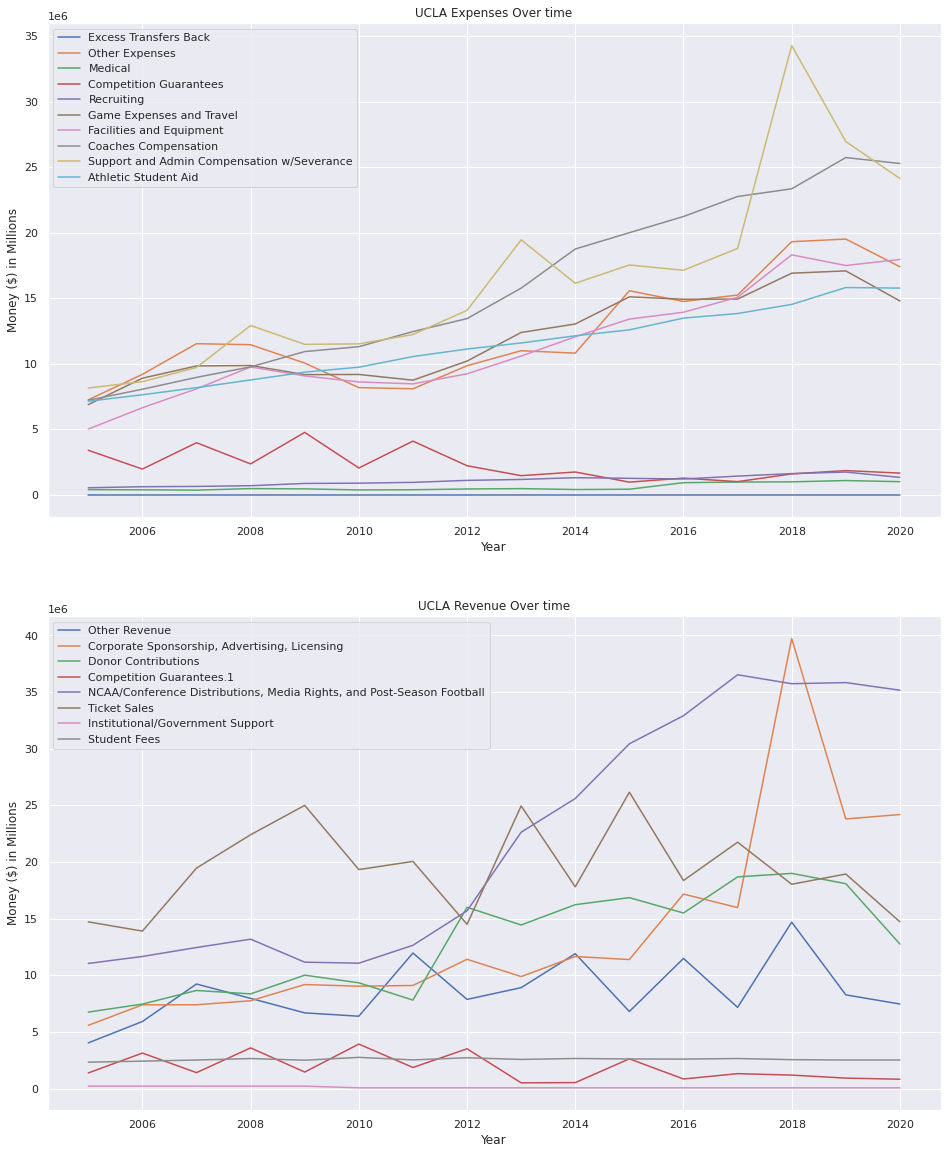

In [284]:
# Data viz
# Basic Histogram of important column variable
fig, ax = plt.subplots(2, 1, figsize = (16, 20))
ucla_rows = df[df["Data"] == "University of California-Los Angeles"] # rows of just UClA observations
for i in range(3, 13):
    ax[0].plot(ucla_rows["Year"], ucla_rows[df.columns[i]], label = df.columns[i])
ax[0].legend(loc="upper left")
ax[0].ticklabel_format(style = "sci", axis = "y", scilimits = (6, 6))
ax[0].set(title = "UCLA Expenses Over time", xlabel = "Year", ylabel = "Money ($) in Millions")

for i in range(14, 22):
    ax[1].plot(ucla_rows["Year"], ucla_rows[df.columns[i]], label = df.columns[i])
    ax[1].legend(loc="upper left")
    ax[1].ticklabel_format(style = "sci", axis = "y", scilimits = (6, 6))
    ax[1].set(title = "UCLA Revenue Over time", xlabel = "Year", ylabel = "Money ($) in Millions")

One of the ways we can illustrate the entirety of the data is by using each column in a graph. In this case, the two line graphs express the expenses and revenues of UCLA's finances from 2005 to 2020. The graphs contain specific parts of UCLA's expenses or revenues. It may help point out any significant deviations of the funding in specific years. The overall trend of the data seems to positively spike upwards over time. This makes sense since with each year expenses and revenues both grow (because of factors like inflation or more money circulation within the school). The plots can guide us to start comparing and investigating the expenses and revenue further.

Some key takeaways from the line graphs also reveal that some streams of revenue or expenses do not change much over time  (e.g. *Excessive Transfers Back* or *Institutional/Government Support*) while others have sharp changes (e.g. *Support and Admin Compensation w/Severance* or *Corporate Sponsorship, Advertising, Licensing*). Later in the research, we will analyze if these spikes are justifiable or questionable.

[Text(0.5, 1.0, 'Football Bowl Subdivision Spending vs Athletics Revenue'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Money ($) in Billions')]

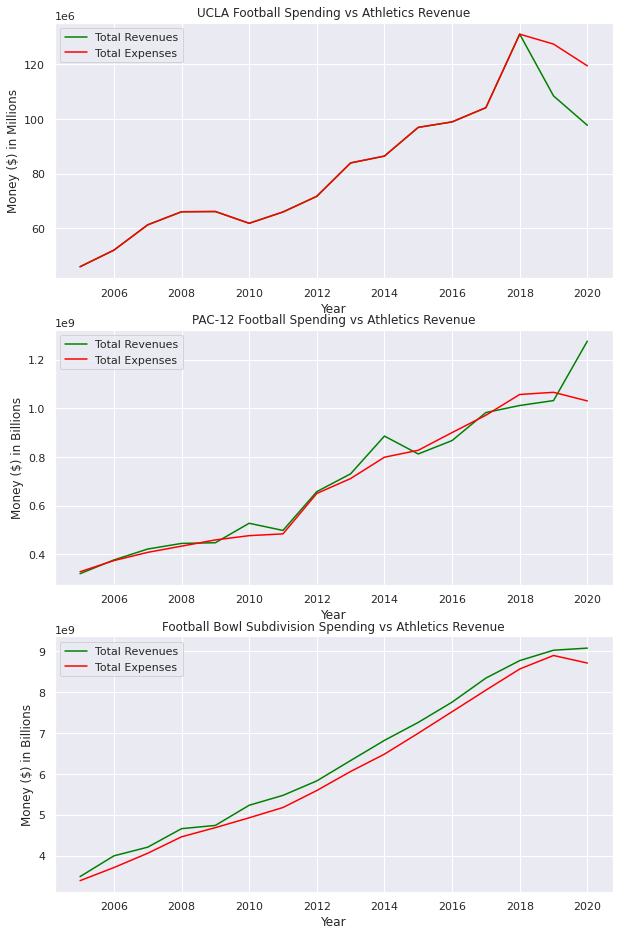

In [285]:
# Data viz
# Line graph overtime of Revenues for each UCLA, PAC-12 median, Football sub-division median
fig, ax = plt.subplots(3, 1, figsize = (10, 16))
ucla_rows = df[df["Data"] == "University of California-Los Angeles"] # rows of just UClA observations
ax[0].plot(ucla_rows["Year"], ucla_rows["Total Revenues"], label = "Total Revenues", color = "green")
ax[0].plot(ucla_rows["Year"], ucla_rows["Total Expenses"], label = "Total Expenses", color = "red")
ax[0].legend(loc="upper left")
ax[0].ticklabel_format(style = "sci", axis = "y", scilimits = (6, 6))
ax[0].set(title = "UCLA Football Spending vs Athletics Revenue", xlabel = "Year", ylabel = "Money ($) in Millions")

pac12_rows = df[df["Data"] == "Pacific-12 Conference Median"] # rows of Pacific-12 median
ax[1].plot(ucla_rows["Year"], pac12_rows["Total Revenues"], label = "Total Revenues", color = "green")
ax[1].plot(ucla_rows["Year"], pac12_rows["Total Expenses"], label = "Total Expenses", color = "red")
ax[1].legend(loc="upper left")
ax[1].ticklabel_format(style = "sci", axis = "y", scilimits = (9, 9))
ax[1].set(title = "PAC-12 Football Spending vs Athletics Revenue", xlabel = "Year", ylabel = "Money ($) in Billions")

fbsub_rows = df[df["Data"] == "Football Bowl Subdivision Median"] # rows of football sub-division median
ax[2].plot(fbsub_rows["Year"], fbsub_rows["Total Revenues"], label = "Total Revenues", color = "green")
ax[2].plot(fbsub_rows["Year"], fbsub_rows["Total Expenses"], label = "Total Expenses", color = "red")
ax[2].legend(loc="upper left")
ax[2].ticklabel_format(style = "sci", axis = "y", scilimits = (9, 9))
ax[2].set(title = "Football Bowl Subdivision Spending vs Athletics Revenue", xlabel = "Year", ylabel = "Money ($) in Billions")

It may be difficult to find a relationship with all the streams of expenses and revenues within UCLA's football program. Thus, we will analyze simply the total values. The three figures, shown over time, reveal the expenses and revenues of UCLA with the other controls. Particularly, it is important to include the median of the Football Bowl Subdivision to illustrate the broad trends compared to UCLA's observation. With that graph, there is a generally consistent trend of a net profit where the expenses usually do not pass the revenue. However, we also include the PAC-12 median since it may be more closely aligned with the same factors as UCLA. The Pac-12 median is different from the Football Bowl Subdivision in where sometimes expenses do exceed the revenue, but the trend normally remains close.

While investigating UCLA's total revenues and expenses, it is expected that the lines are closely related but not too close or too far. Surprisingly, the total revenues and expenses for all but 2019 and 2020 are exactly matched where the net profit is 0. We only see a deviation of net loss after 2018, which may be explained by the COVID-19 pandemic where a shutdown in sports activities occured. However, the visual shown is clearly skeptical and worth further investigating. The trend shown in UCLA's line graph is atypical but may be explained by some collection error or caused by nefarious manipulation.

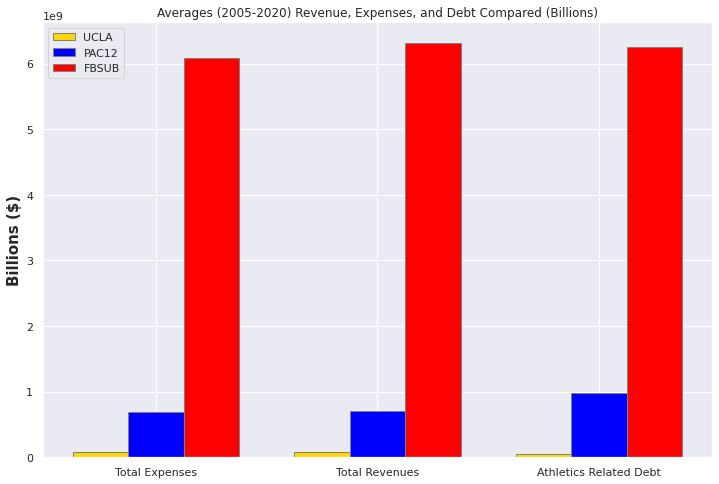

In [286]:
# Data viz
# Barchart for UCLA/PAC-12/Subdivision averages

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
UCLA = [np.mean(ucla_rows["Total Expenses"]),
        np.mean(ucla_rows["Total Revenues"]),
        np.mean(ucla_rows["Athletics Related Debt"])]
PAC12 = [np.mean(pac12_rows["Total Expenses"]),
         np.mean(pac12_rows["Total Revenues"]),
         np.mean(pac12_rows["Athletics Related Debt"])]
FBSUB = [np.mean(fbsub_rows["Total Expenses"]),
         np.mean(fbsub_rows["Total Revenues"]),
         np.mean(fbsub_rows["Athletics Related Debt"])]

# Set position of bar on X axis
br1 = np.arange(len(UCLA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, UCLA, color ='gold', width = barWidth,
        edgecolor ='grey', label ='UCLA')
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(9, 9))
plt.bar(br2, PAC12, color ='blue', width = barWidth,
        edgecolor ='grey', label ='PAC12')
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(9, 9))
plt.bar(br3, FBSUB, color ='red', width = barWidth,
        edgecolor ='grey', label ='FBSUB')
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(9, 9))

# Adding Xticks
plt.title("Averages (2005-2020) Revenue, Expenses, and Debt Compared (Billions)")
plt.ylabel('Billions ($)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(UCLA))],
        ['Total Expenses', 'Total Revenues', 'Athletics Related Debt'])

    
plt.legend()
plt.show()

Each data from UCLA, PAC-12 median, and the football bowl subdivision median is in very different scopes. Of course, the football bowl subdivision will contain the largest observations while UCLA contains only a small proportion of the numerical observations. The graph puts into a picture the scale of revenues, expenses, and debts of the different groups compared.

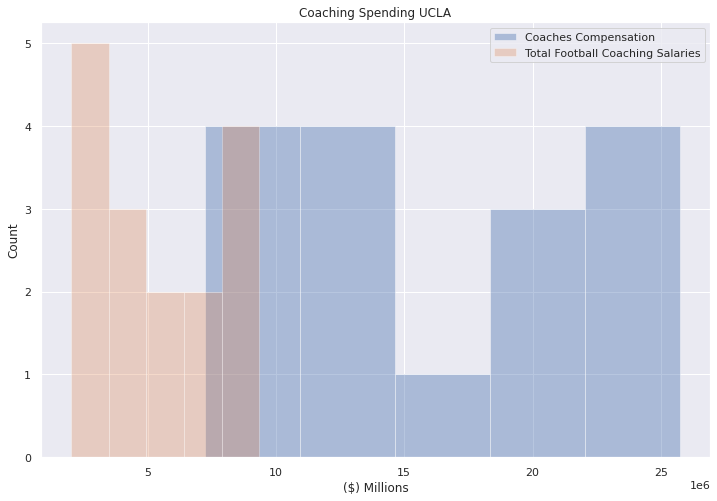

In [287]:
# Data viz
# Basic Histogram of coaching variables
plt.figure(figsize=(12, 8))
plt.hist(ucla_rows["Coaches Compensation"], bins = 5, alpha = 0.4, label = "Coaches Compensation")
plt.hist(ucla_rows["Total Football Coaching Salaries"], bins = 5, alpha = 0.3, label = "Total Football Coaching Salaries")
plt.ticklabel_format(style = "sci", axis = "x", scilimits = (6, 6))
plt.legend(loc = 'upper right')
plt.title('Coaching Spending UCLA')
plt.xlabel('($) Millions')
plt.ylabel('Count')
plt.show()

Coaches' salaries and compensation are key factors that are concerning for some people. It may be important to know the trends of their benefits. In the *Coaching Spending UCLA* histogram, the data has two peaks. In reality, coaches like UCLA's Chip Kelly are unique in that many programs do not contribute high amounts toward coaching but it does happen to a similar frequency of the minimal times of coaching pay allocation.

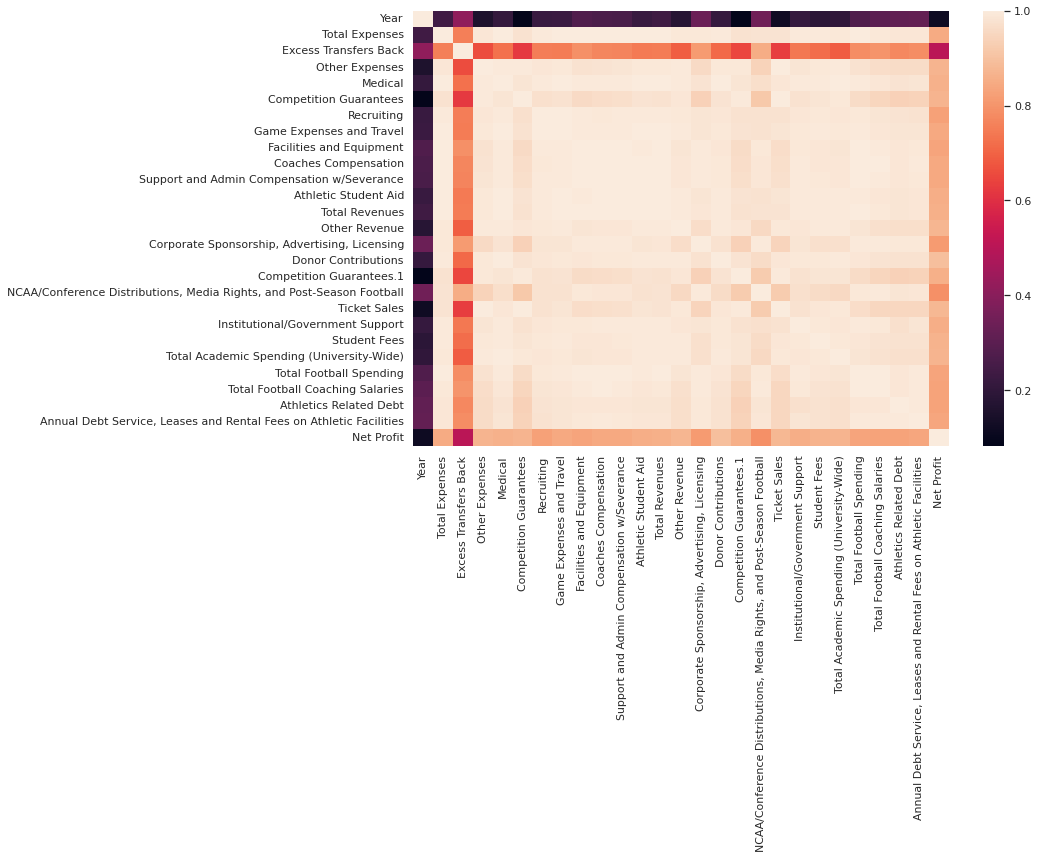

In [288]:
# Data viz
# Correlation heat map of the column variables
cormat = df.corr()
round(cormat,2)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(cormat);

One of the notable trends seen in the data is that over time the costs and revenues of school's football programs naturally increase. This makes it difficult to perform analysis since we must keep in mind the increased years also have observations that are larger. It is also apparent in the correlation plot. Some of the correlations are sensible such as the types of revenue.

*Excess Transfers Back* also seems to be correlated with the factors, however, the column is filled with mainly 0's and is not very relevant to our research.

Student Fees compared to Coaching Salaries


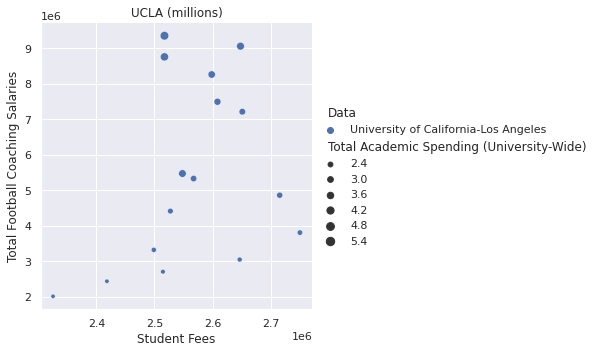

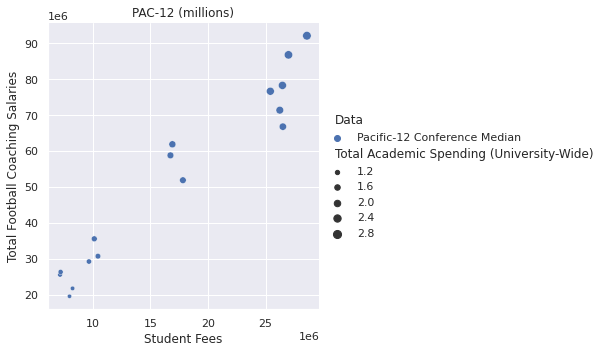

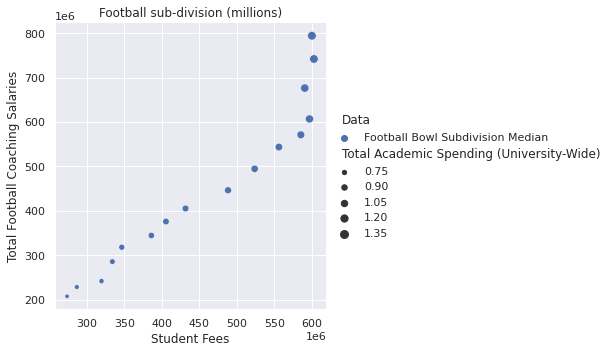

In [289]:
# Data viz
# Looking at student/school/coaches cost
print("Student Fees compared to Coaching Salaries")
sns.relplot(
    data = ucla_rows,
    x = "Student Fees", y = "Total Football Coaching Salaries",
    hue = "Data", size = "Total Academic Spending (University-Wide)"
).set(title = "UCLA (millions)")
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(6, 6))

sns.relplot(
    data = pac12_rows,
    x = "Student Fees", y = "Total Football Coaching Salaries",
    hue = "Data", size = "Total Academic Spending (University-Wide)"
).set(title = "PAC-12 (millions)")
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(6, 6))

sns.relplot(
    data = fbsub_rows,
    x = "Student Fees", y = "Total Football Coaching Salaries",
    hue = "Data", size = "Total Academic Spending (University-Wide)"
).set(title = "Football sub-division (millions)")
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(6, 6))

Investigating the coaching salaries further, we can relate them to the *Student Fees* to determine their true relationship. For each group, the plots above indicate that with an increase in student fees and total academic spending, coaching salaries  will also increase. The Football sub-division median data illustrates how a maximum of student fees, from larger spending academic Universities, the coaching salaries will still increase.

Observing the UCLA data, the trend is less aligned with the football subdivision median data. Increased student fees do not firmly align with coaching salaries. Instead, more total academic spending means a higher emphasis on coaching salary spending. The UCLA data may suggest at some point student fees were reduced and the fees are not typically spent on the coaching salaries.

In [290]:
# any other data visualization that I can add may come from the machine learning analysis part
# Other suggestions for later creation
# 1. Difference in coaching and student tuition graph (can be bar or box plot)
# 2. Scatter plot on debt playing a role in UCLA student costs or in revenues

In [291]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [292]:
def trend_plot(x_var, y_var):
    # Prints scatterplot with linear best fit regression line based on x, y
    # y is preferably the cost large scaled with millions
    fig, ax = plt.subplots(3, 1, figsize = (12, 28))
    dataType = [ucla_rows, pac12_rows, fbsub_rows]
    for i in range(0, len(dataType)):
        X = np.array(dataType[i][x_var])
        y = np.array(dataType[i][y_var])
        reg = LinearRegression().fit(X.reshape(-1,1), y)
        ytrain = reg.intercept_ + reg.coef_ * X
        print(str(dataType[i]["Data"].unique()[0]), ":")
        print("Regression Coef:", reg.coef_)
        print("Regression intercept:", reg.intercept_)
        print("MSE:", mean_squared_error(y, ytrain))
        print("r-squared:", r2_score(y, ytrain))
        ax[i].plot(X,y,'ro',X,ytrain,'b-')
        ax[i].ticklabel_format(axis = "y", style = "scientific", scilimits=(6, 6))
        ax[i].set(title = str(y_var + " by " + x_var + " " + dataType[i]["Data"].unique()[0]), 
                  xlabel = x_var, ylabel = y_var)
        print("\n")

University of California-Los Angeles :
Regression Coef: [17.26270338]
Regression intercept: -31426457.32610917
MSE: 15270559360715.352
r-squared: 0.17451779594189865


Pacific-12 Conference Median :
Regression Coef: [7.25997153]
Regression intercept: 46498410.02354169
MSE: 4119430570852225.0
r-squared: 0.4598645647421795


Football Bowl Subdivision Median :
Regression Coef: [2.67484655]
Regression intercept: 98584342.46955323
MSE: 5575992418345339.0
r-squared: 0.9481950996370788




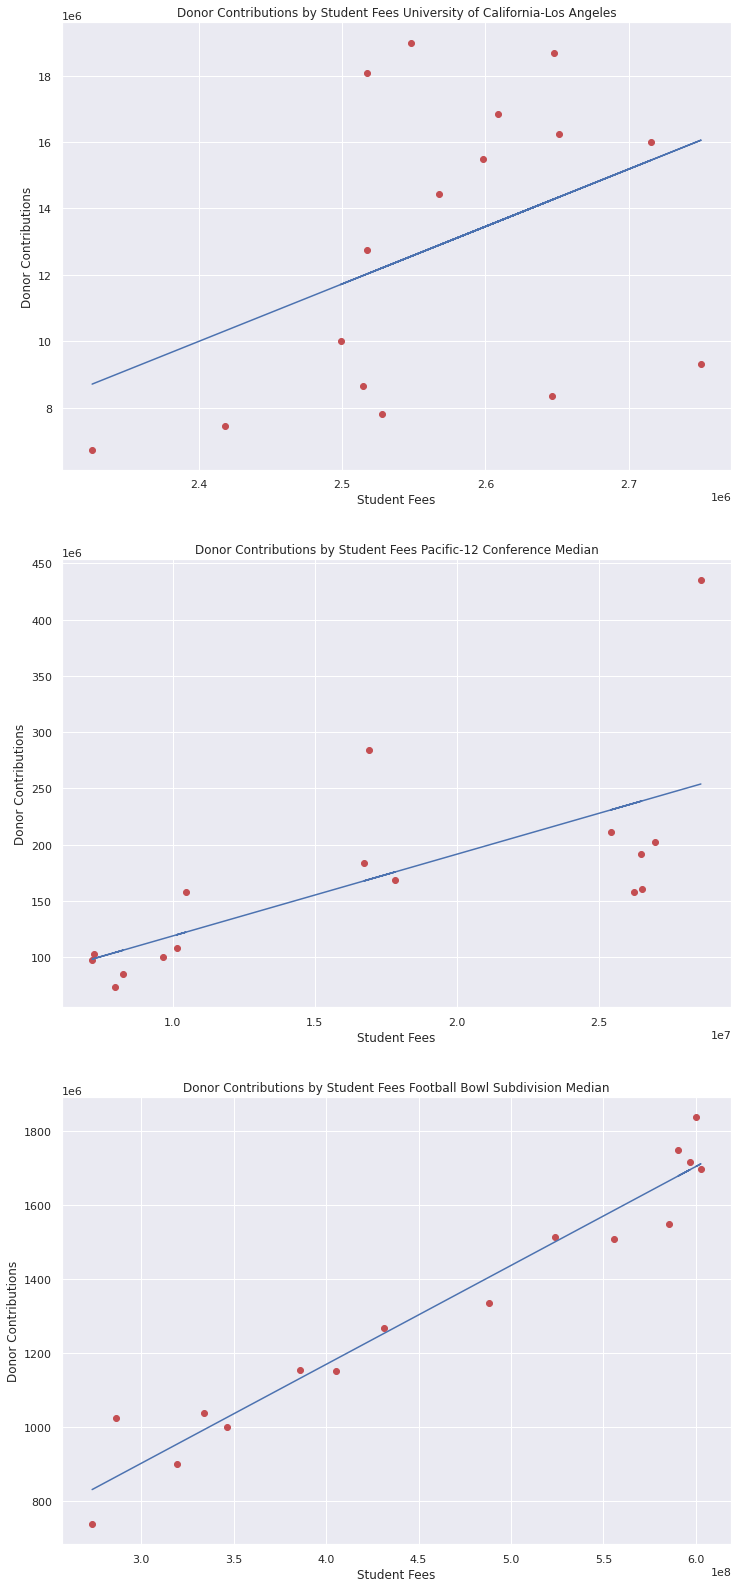

In [293]:
trend_plot("Student Fees", "Donor Contributions")

To investigate student fees further, a linear regression will be useful. Funds from other revenues, like donor contributions, can reveal how essential student fees are to football programs. Mostly, the graphs from the linear regression plots explain that more student fees result in more successful donor contributions. In the case of UCLA, it is difficult to conclude this trend with such a low r-square score (0.17). Despite this, increased student fees do seem to indicate a positive relationship with donor contributions.

University of California-Los Angeles :
Regression Coef: [0.12106327]
Regression intercept: 18715213.153087165
MSE: 14075059539979.188
r-squared: 0.006290979464063318


Pacific-12 Conference Median :
Regression Coef: [1.10982252]
Regression intercept: 76147696.54146959
MSE: 92205197849993.67
r-squared: 0.8870859194193657


Football Bowl Subdivision Median :
Regression Coef: [0.99566821]
Regression intercept: 838539621.3265102
MSE: 6447258098955592.0
r-squared: 0.832499571822346




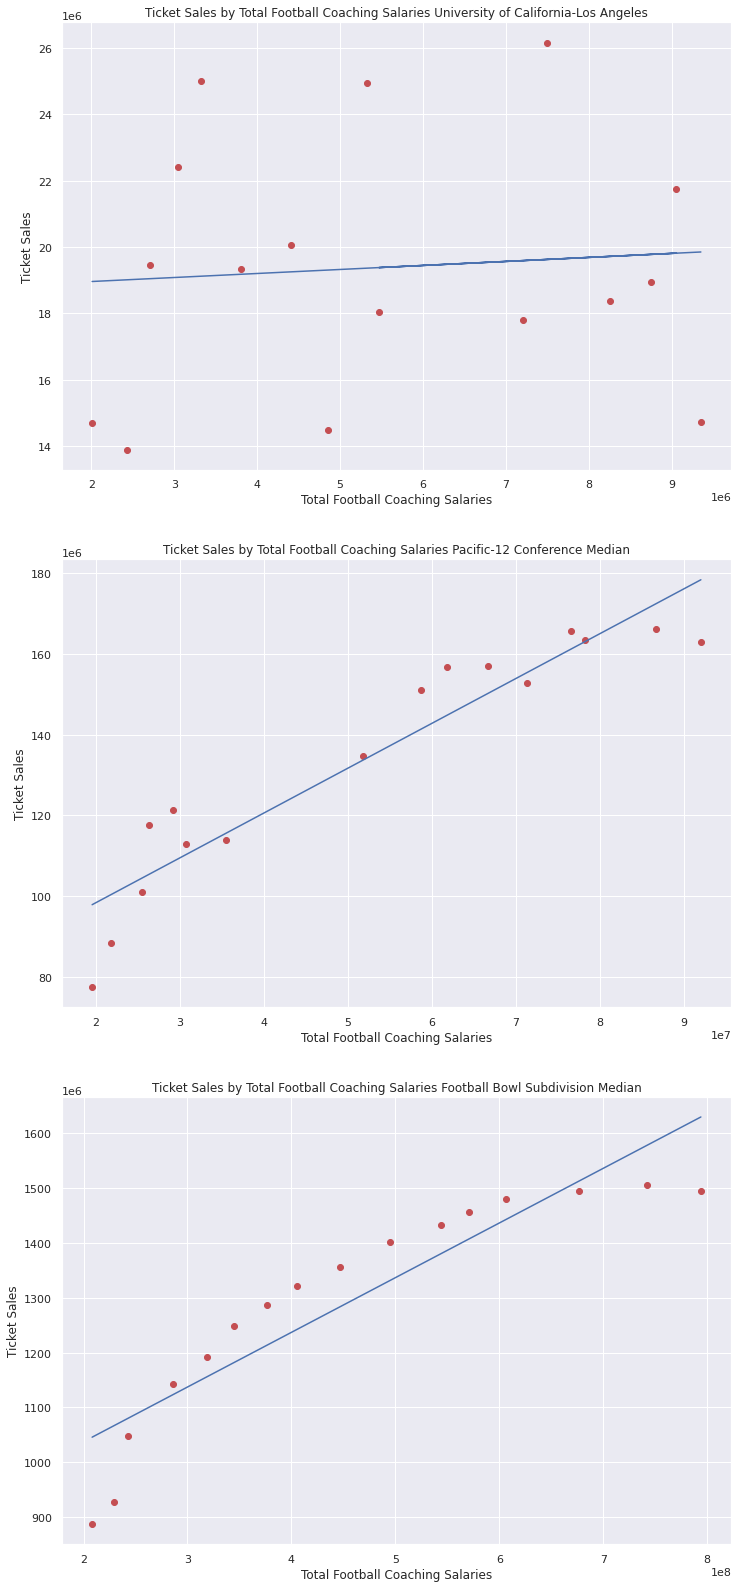

In [294]:
trend_plot("Total Football Coaching Salaries", "Ticket Sales")

One of the key questions based on the research question at hand was investigating how significant coaches played a role in the football program's success. Again, developing a linear regression plot but with coaching salaries and a response variable of ticket sales (a good measure of football success) was performed. 

Notably, an increase in coaching salaries does seem to increase ticket sales for most football programs. However, the trend line of the Football Bowl Subdivision Median is not a straight line, instead, it is a curve. Essentially, an increase in coaching salaries will help until a max efficiency. Then, more funding in coaching salaries has diminishing returns.

The r-squared value for UCLA's graph is very low (0.006). This can signal that the amount UCLA pays their football coaching salaries is not dependent on ticket sales.

### Discussion

Over the course of analyzing UCLA's financial allocation in their football program, I found many insightful and surprising trends. While even observing the variables, there are many key components to a program's expenses and revenues to explore. One interesting insight conveyed how over time, an increase in revenue and expenses were also related. The following graphs help illustrate how net profit does not increase over the years. As a result, this can mean that more money is put into football programs each year without substantial net gain. It may be riskier to invest in football programs without the proportional returns as more money is empowered in football programs. In addition, student fees also seemed to increase as coaching salaries increased. If students are paying more for their football programs, the coaching should be reflective of the success of the football program.

University of California-Los Angeles :
Regression Coef: [-841248.38823529]
Regression intercept: 1690473407.5735285
MSE: 30378724045397.17
r-squared: 0.3311203533542131


Pacific-12 Conference Median :
Regression Coef: [3580282.17352941]
Regression intercept: -7185528694.977938
MSE: 4120135072629880.5
r-squared: 0.06201247367747498


Football Bowl Subdivision Median :
Regression Coef: [6801621.00735294]
Regression intercept: -13454964716.985294
MSE: 6302242794178873.0
r-squared: 0.13493843758056845




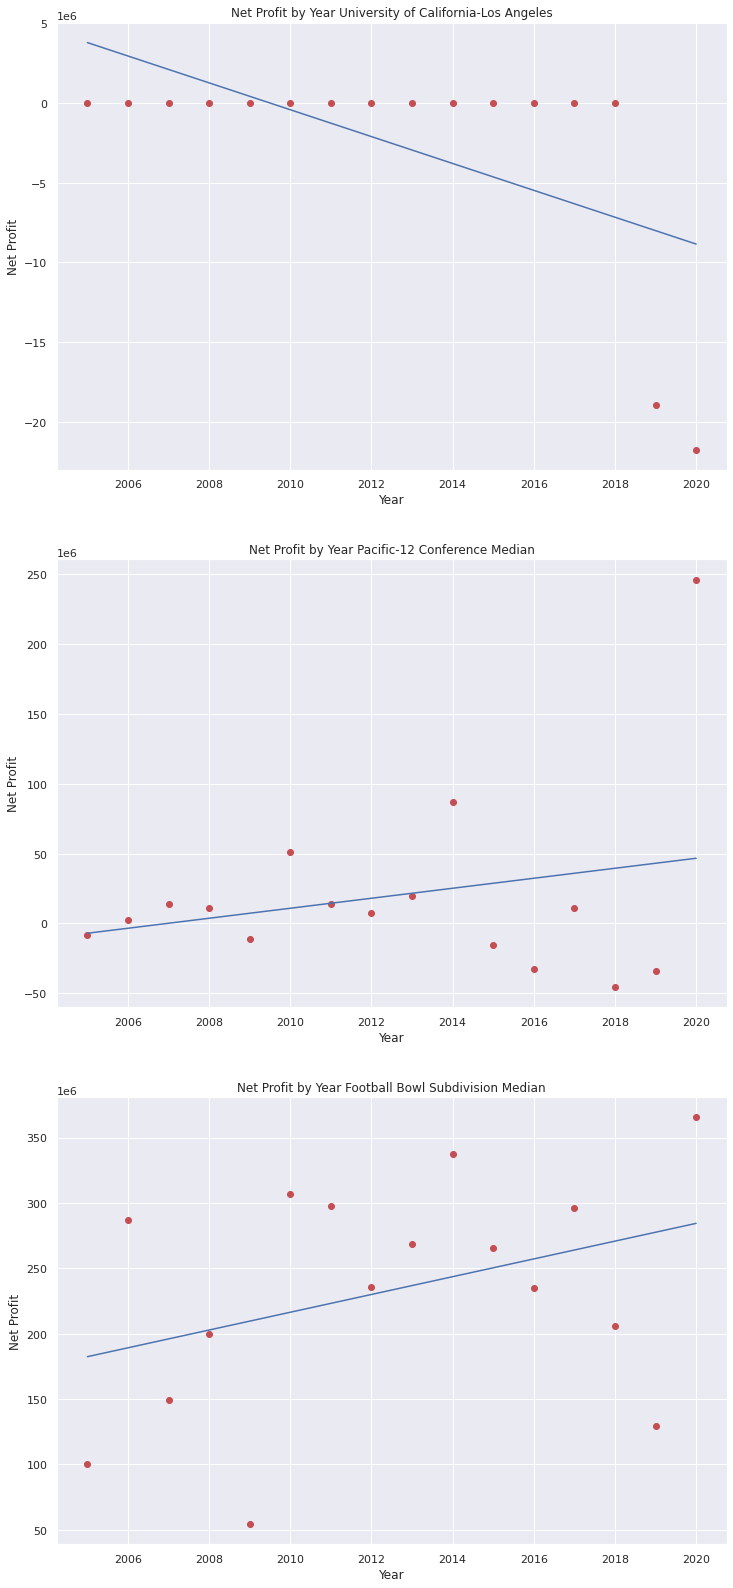

In [295]:
trend_plot("Year", "Net Profit")

Overall, does UCLA and other academic institutions effectively allocate their football funds? I believe the answer is that most academic institutions do in fact allocate their expenses well. On the other hand, UCLA instead may have questionable funding behaviors. In the Football Bowl subdivision and the PAC-12 conference, the increased investment of student fees and coaching salaries generally produced increased football success. The investment correlates to more recognition (ticket sales, donor contributions) but does not associate with net profit (as explained above). 

In contrast, a noteworthy result of analyzing UCLA's financial allocations over the years raised an alarming flag. Unfortunately, I am unable to explain how the revenue and expenses of UCLA matched from the years prior to 2019. Of course, this is unlikely and would require further investigation into the data collection methods. Nevertheless, I was also able to analyze UCLA's funding in coaching salaries. The result of coaching salaries was not dependent on how successful the football program was at UCLA. This implies how UCLA may be overpaying their coaching staff as the returns are not beneficial. However, student fees were not very correlated with coaching salaries. Thus, students' contributions do not clearly fund these salaries, but some other source of expenses does.

The research conducted helps provide context to some of the controversies in college football programs, but it did bring into light new questions. All in all, further inquiry is highly recommended and to keep in check with how money is allocated in sports programs across the US.